### COMPARISON BETWEEN ALL THE THREE COEFFS

@pickle_results: using precomputed results from 'fig_correlations_dump.pkl'


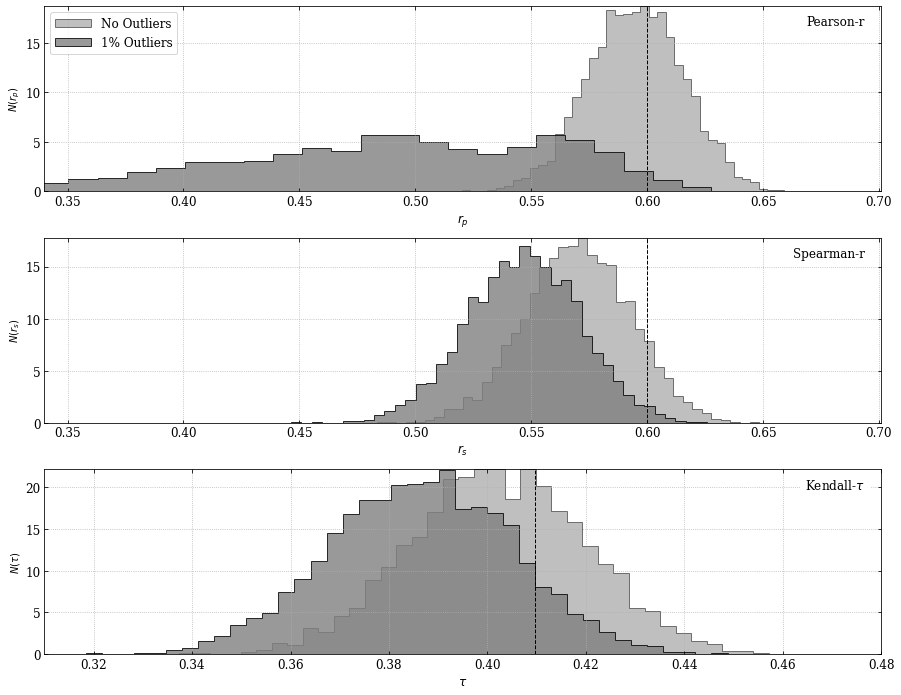

In [4]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau = 0.6
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))
   
    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]
                
    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.05, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_p', 'r_s', r'\tau']\

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.grid()
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
        ax.grid()
        
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()

### COMPARSION BETWEEN SPEARMAN AND KENDALL

@pickle_results: using precomputed results from 'fig_correlations_dump1.pkl'


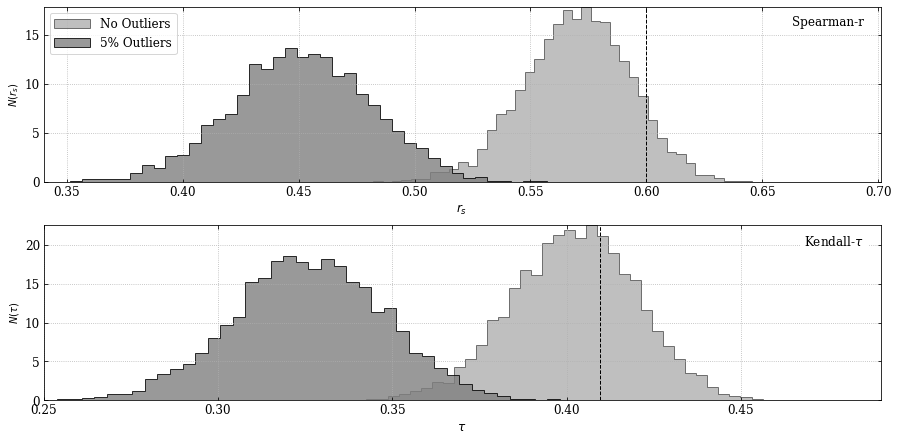

In [1]:
##increasing the outliers percentage
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.05

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump1.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j,k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_s', r'\tau']\

for i in range(2):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i ==0:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
        ax.grid()
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.25, 0.49)
        ax.grid()
        
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()

@pickle_results: using precomputed results from 'fig_correlations_dump3.pkl'


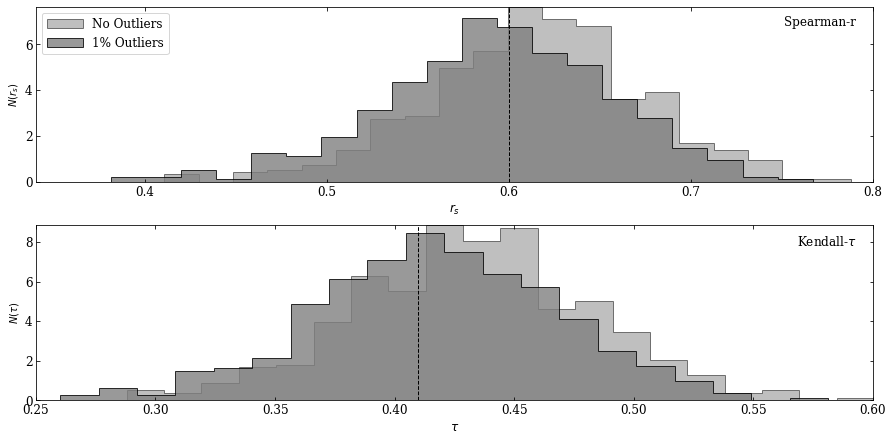

In [8]:
##reducing the number of samples
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 500
N = 100

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump3.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j,k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_s', r'\tau']\

for i in range(2):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 20,histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i ==0:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.8)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.25,0.6)
                    
        ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()

@pickle_results: using precomputed results from 'fig_correlations_dump7.pkl'


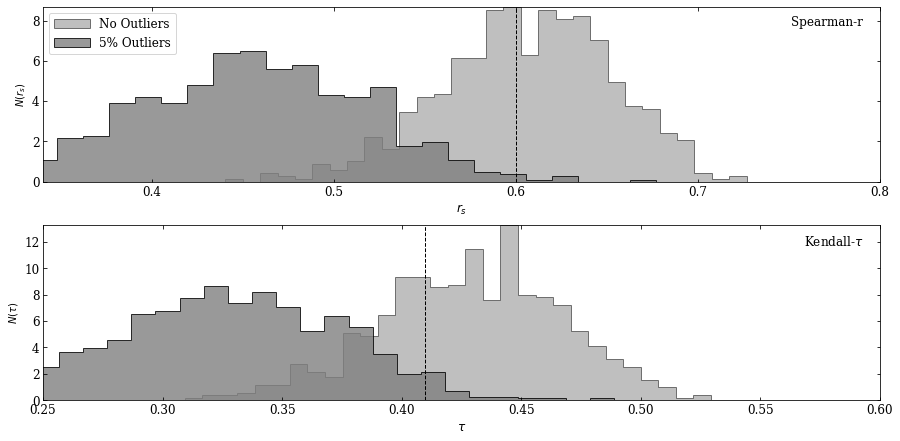

In [9]:
##increasing the percentage of outliers and reducing the sample size
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 700
N = 200

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.05

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump7.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j,k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_s', r'\tau']\

for i in range(2):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 30,histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i ==0:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.8)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.25,0.6)
                    
        ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()

@pickle_results: using precomputed results from 'fig_correlations_dump33.pkl'


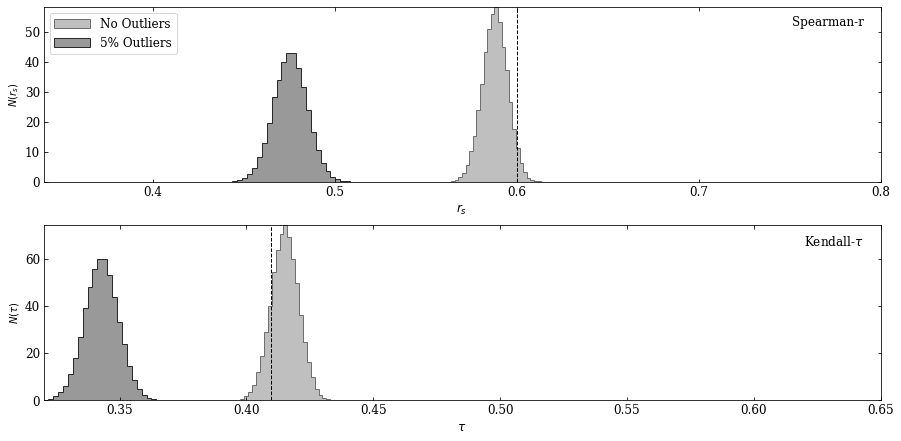

In [15]:
##drastically increasing the sample size to 10k and increasing the outliers to 5%
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 50000
N = 10000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.05

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump33.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j,k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_s', r'\tau']\

for i in range(2):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 30,histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i ==0:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.8)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.32,0.65)
                    
        ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()

@pickle_results: using precomputed results from 'fig_correlations_dum55.pkl'


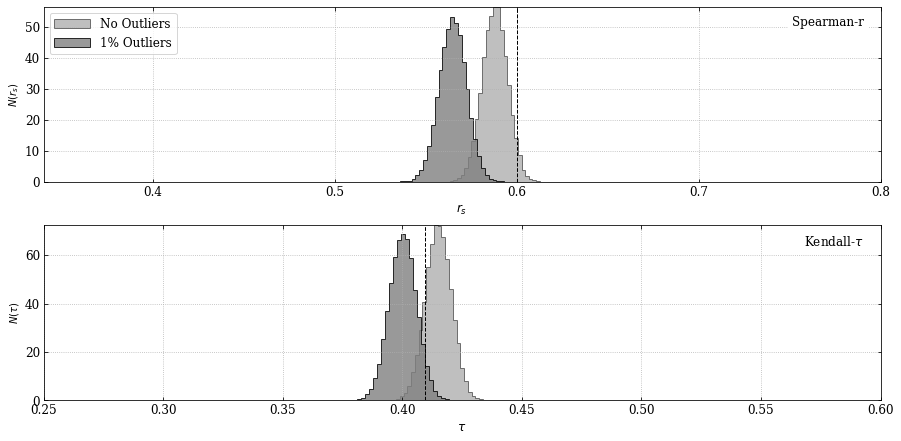

In [16]:
##drastically increasing the sample size to 10k 
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

import matplotlib

#for textbook feel
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

# Set parameters for the distributions
Nbootstraps = 50000
N = 10000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

#sampling the distribution without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, alpha, int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dum55.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j,k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100),'%')))

distributions = ['Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_s', r'\tau']\

for i in range(2):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 30,histtype='stepfilled', fc='gray',density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i ==0:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.8)
        ax.grid()
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.25,0.6)
        ax.grid()
                    
        ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'),fontsize=12)

    ax.set_xlabel('$%s$' % xlabels[i],fontsize=12)
    ax.set_ylabel('$N(%s)$' % xlabels[i],fontsize=10)

plt.show()